In [87]:
#installation of dataset
!pip install opendatasets

In [88]:
import opendatasets as od

In [89]:
od.download("https://www.kaggle.com/datasets/shantanudhakadd/bank-customer-churn-prediction")

Skipping, found downloaded files in ".\bank-customer-churn-prediction" (use force=True to force download)


In [90]:
data='./bank-customer-churn-prediction'

In [91]:
import os
os.listdir(data)

['.ipynb_checkpoints']

In [92]:
#exploratory analysisof the dataset
import pandas as pd
data=pd.read_csv('Churn_Modelling.csv')
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [93]:
import numpy as np  
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,precision_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [94]:
data.shape

(10000, 14)

In [95]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [96]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [97]:
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [98]:
data['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [99]:
data['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [100]:
data['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

<Axes: xlabel='Exited', ylabel='count'>

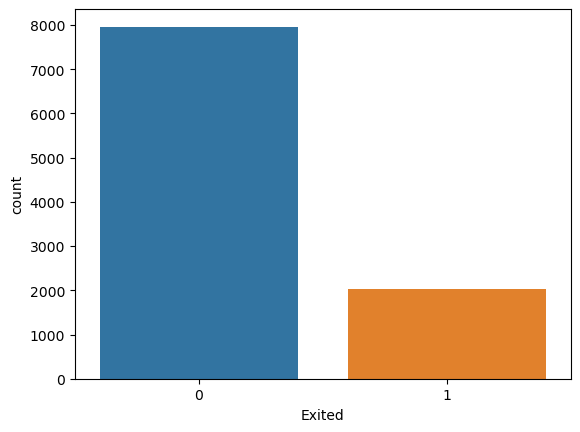

In [101]:
#graphical exploration of the dataset
import seaborn as sns
sns.countplot(x='Exited', data= data)

<Axes: xlabel='Exited', ylabel='count'>

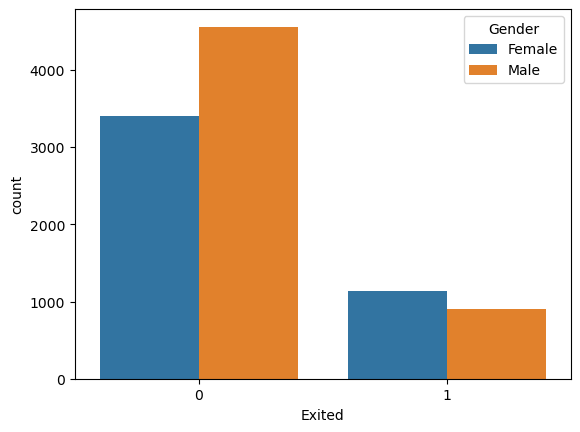

In [102]:
sns.countplot(x='Exited', hue='Gender', data= data)

<Axes: xlabel='Exited', ylabel='count'>

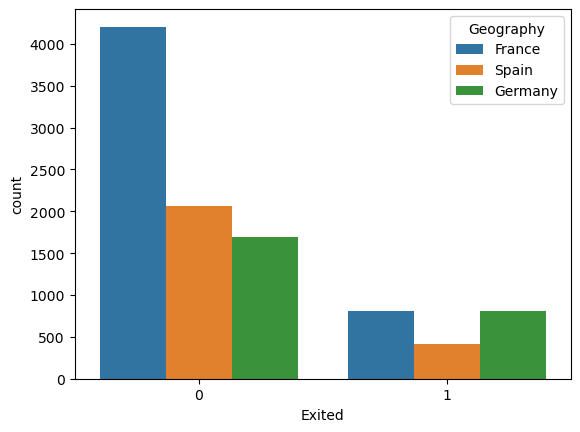

In [103]:
sns.countplot(x='Exited',hue='Geography', data= data)

<Axes: xlabel='Exited', ylabel='count'>

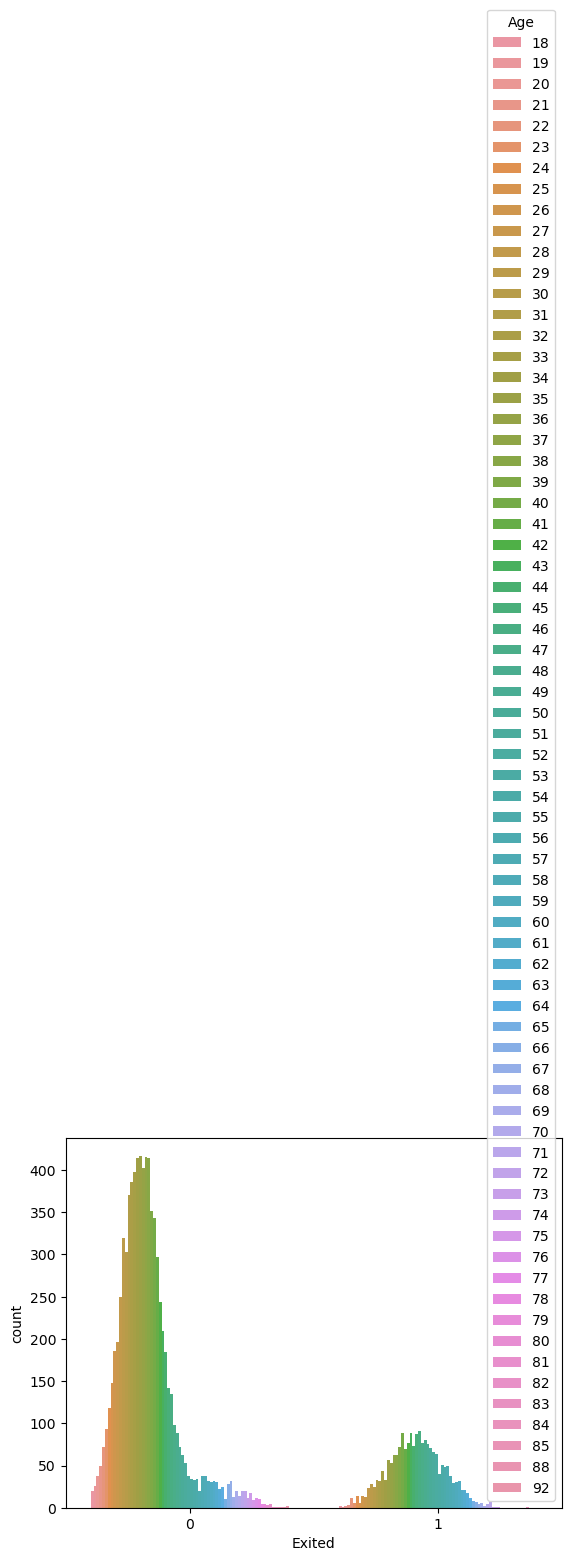

In [104]:
sns.countplot(x='Exited',hue= 'Age',data= data)

In [105]:
data.drop(['RowNumber','CustomerId','Surname'], axis=1, inplace=True)

In [106]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [107]:
#converting the columns containing text into numerical values using LabelEncoder
label_encoder=LabelEncoder()
data['Geography']=label_encoder.fit_transform(data['Geography'])
data['Gender']=label_encoder.fit_transform(data['Gender'])

In [108]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0


<Axes: >

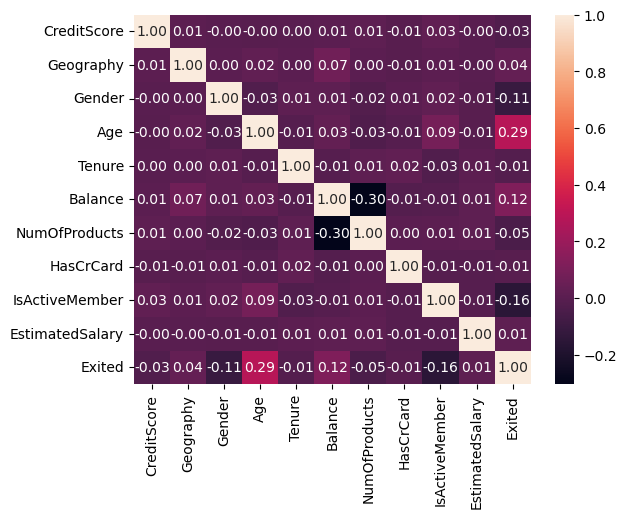

In [109]:
sns.heatmap(data.corr(),annot=True, fmt='.2f')

In [110]:
x=data.drop(['Exited'],axis=1)
y=data['Exited']

In [111]:
#training the dataset using LogisticRegression and RandomForestClassifier
X_train, X_test, y_train, y_test= train_test_split(x, y, test_size =0.2, random_state = 2)

In [112]:
mod1=LogisticRegression()
mod2=RandomForestClassifier()

In [113]:
mod1.fit(X_train,y_train)

LogisticRegression()

In [114]:
y_pred1= mod1.predict(X_test)
print(confusion_matrix(y_test,y_pred1))
print('accuracy score:',accuracy_score(y_test,y_pred1))
print('precision score:', precision_score(y_test,y_pred1))
print('classification report', classification_report(y_test,y_pred1))

[[1584   33]
 [ 368   15]]
accuracy score: 0.7995
precision score: 0.3125
classification report               precision    recall  f1-score   support

           0       0.81      0.98      0.89      1617
           1       0.31      0.04      0.07       383

    accuracy                           0.80      2000
   macro avg       0.56      0.51      0.48      2000
weighted avg       0.72      0.80      0.73      2000



In [115]:
mod2.fit(X_train,y_train)

RandomForestClassifier()

In [116]:
y_pred2= mod1.predict(X_test)
print(confusion_matrix(y_test,y_pred1))
print('accuracy score:',accuracy_score(y_test,y_pred2))
print('precision score:', precision_score(y_test,y_pred2))
print('classification report', classification_report(y_test,y_pred2))

[[1584   33]
 [ 368   15]]
accuracy score: 0.7995
precision score: 0.3125
classification report               precision    recall  f1-score   support

           0       0.81      0.98      0.89      1617
           1       0.31      0.04      0.07       383

    accuracy                           0.80      2000
   macro avg       0.56      0.51      0.48      2000
weighted avg       0.72      0.80      0.73      2000



In [117]:
#LogisticRegression gives an accuracy score of 79.95%
#RandomForestClassifier gives an accuracy score of 79.95%